In [1]:
path = "data/mici/karate/karate.gml"
resolution_value = 0.8

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
graph = nx.read_gml(path)

In [3]:
print(graph)

Graph with 34 nodes and 78 edges


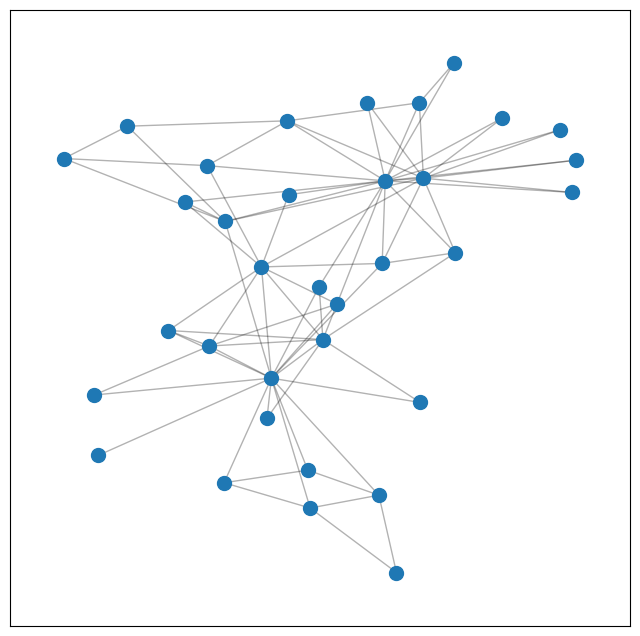

In [4]:
pos = nx.spring_layout(graph)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(graph, pos, node_size=100)
nx.draw_networkx_edges(graph, pos, alpha=0.3)
plt.show()

In [5]:
from networkx.algorithms import community

communities_generator = community.louvain_communities(graph, resolution=resolution_value)
communities = [x for x in communities_generator]
print(communities)

[{'6', '5', '17', '11', '7'}, {'2', '14', '1', '18', '22', '4', '12', '20', '13', '3', '10', '8'}, {'15', '26', '31', '29', '33', '16', '30', '9', '28', '34', '27', '25', '19', '24', '32', '23', '21'}]


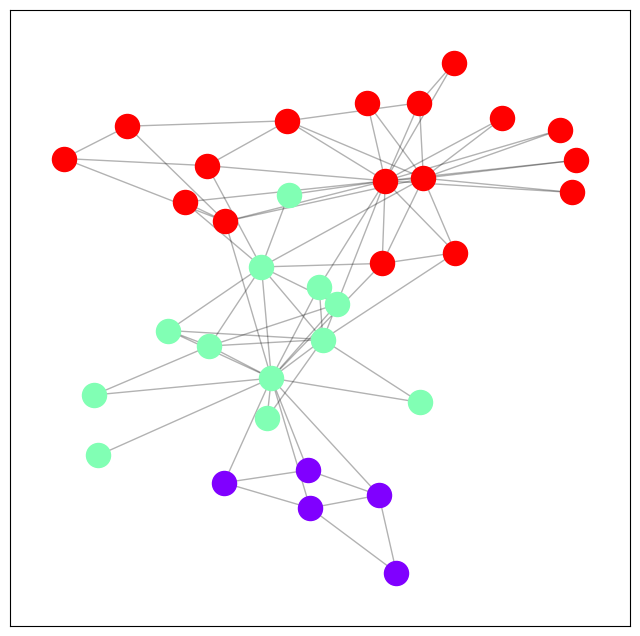

In [6]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

plt.figure(figsize=(8, 8))
for community, color in zip(communities, colors):
    nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=[color])

nx.draw_networkx_edges(graph, pos, alpha=0.3)

plt.show()

In [7]:
def get_node_label(node_id):
    return node_id

In [8]:
for i, community in enumerate(communities):
    print(f'{i + 1} community:', end=' ')
    for node in community:
        print(get_node_label(node), end=', ')
    print()

1 community: 6, 5, 17, 11, 7, 
2 community: 2, 14, 1, 18, 22, 4, 12, 20, 13, 3, 10, 8, 
3 community: 15, 26, 31, 29, 33, 16, 30, 9, 28, 34, 27, 25, 19, 24, 32, 23, 21, 


In [9]:
for index, node in enumerate(graph.nodes(data=False)):
    for i, community in enumerate(communities):
        if node in community:
            print(f'{index + 1} {i + 1}')

1 2
2 2
3 2
4 2
5 1
6 1
7 1
8 2
9 3
10 2
11 1
12 2
13 2
14 2
15 3
16 3
17 1
18 2
19 3
20 2
21 3
22 2
23 3
24 3
25 3
26 3
27 3
28 3
29 3
30 3
31 3
32 3
33 3
34 3
